In [15]:
import librosa
from librosa.display import specshow
import numpy as np
import matplotlib.pyplot as plt

from bayesian_nls import bayesian_nls

sr = 16000
window_size = int(sr * 0.025)
hop_size = int(sr * 0.01)

cleen_speech, sp_sr = librosa.load('CleanSpeech.wav', sr=None)
vib_flute, fl_sr = librosa.load('vib_flute.wav', sr=None)

def addnoise(sig, input_noise, snr):
    noise = input_noise
    noise_std_var = np.sqrt(10 ** (-snr * 0.1) * (sig @ sig) /(noise @ noise))
    output_noise = noise_std_var * noise
    return output_noise

def result_display(result, signal):
    pitch, voicing, order = result[:, 0], result[:, 1], result[:, 2]
    mask = voicing < 0.5
    pitch[mask] = np.nan
    order[mask] = np.nan

    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot(4, 1, 4)
    time = np.arange(signal.shape[0]) / sr
    plt.plot(time, signal / np.abs(signal).max())
    plt.xlim(0, time.max())
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

    S = librosa.stft(signal, hop_length=hop_size)
    S = librosa.amplitude_to_db(np.abs(S), ref=np.max)

    plt.subplot(4, 1, 3, sharex=ax)
    specshow(S, y_axis='linear', x_axis='time', sr=sr, hop_length=hop_size, cmap='viridis')
    timeVector = np.arange(result.shape[0]) * hop_size / sr
    plt.plot(timeVector, pitch, 'r-', linewidth=2)
    plt.ylim(0, 500)
    plt.ylabel('Frequency')
    plt.subplot(4, 1, 2, sharex=ax)
    plt.plot(timeVector, order, 'r.', linewidth=2)
    plt.ylabel('Order estimate')
    plt.subplot(4, 1, 1, sharex=ax)
    plt.plot(timeVector, voicing, 'r-', linewidth=2)
    plt.ylabel('Voicing probability')
    plt.show()


## White Noise

 10%|█         | 59/583 [00:06<01:27,  5.98it/s]/home/joey_yu/PycharmProjects/bayesian_pitchtrack/bayesian_nls.py:145: RuntimeWarning: divide by zero encountered in log
  bar_alpha = np.log(state_prior) + self.pitch_ll
100%|██████████| 583/583 [01:35<00:00,  6.14it/s]


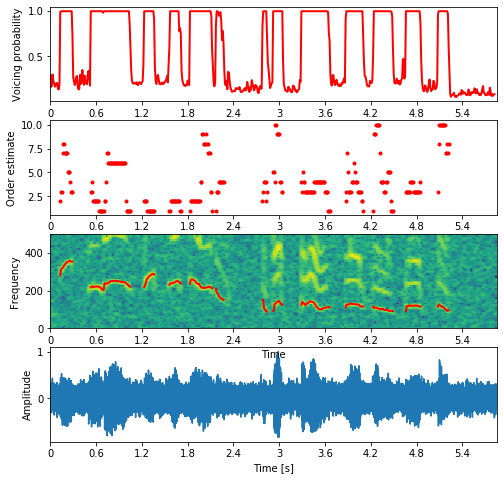

In [16]:
SNR = 0
noisy_signal = cleen_speech + addnoise(cleen_speech,
                                       np.random.randn(*cleen_speech.shape),
                                       SNR)

result = bayesian_nls(noisy_signal, sr, window_size, hop_size, max_order=10)
result_display(result, noisy_signal)

## Factory Noise

In [ ]:
SNR = 0
noisy_signal = cleen_speech + addnoise(cleen_speech,
                                       np.random.randn(*cleen_speech.shape),
                                       SNR)

result = bayesian_nls(noisy_signal, sr, window_size, hop_size, max_order=10)
pitch, voicing, order = result[:, 0], result[:, 1], result[:, 2]
mask = voicing < 0.5
pitch[mask] = np.nan
order[mask] = np.nan

fig = plt.figure(figsize=(12, 10))
ax = plt.subplot(4, 1, 4)
time = np.arange(noisy_signal.shape[0]) / sr
plt.plot(time, noisy_signal / np.abs(noisy_signal).max())
plt.xlim(0, time.max())
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

S = librosa.stft(noisy_signal, hop_length=hop_size)
S = librosa.amplitude_to_db(np.abs(S), ref=np.max)

plt.subplot(4, 1, 3, sharex=ax)
specshow(S, y_axis='linear', x_axis='time', sr=sr, hop_length=hop_size, cmap='viridis')
timeVector = np.arange(result.shape[0]) * hop_size / sr
plt.plot(timeVector, pitch, 'r-', linewidth=2)
plt.ylim(0, 500)
plt.ylabel('Frequency')
plt.subplot(4, 1, 2, sharex=ax)
plt.plot(timeVector, order, 'r.', linewidth=2)
plt.ylabel('Order estimate')
plt.subplot(4, 1, 1, sharex=ax)
plt.plot(timeVector, voicing, 'r-', linewidth=2)
plt.ylabel('Voicing probability')
plt.show()
